### Q1. Explain GET and POST methods.

**GET** Get method is mainly used at the client (Browser) side to send a request to a specified server to get certain data or resources. Using this method the server should only let us receive the data and not change its state. Hence it is only used to view something and not to change it. Get method is one of the most used HTTP method. The request parameter of the get method is appended to the URL. Get request is better for the data which does not need to be secure (It means the data which does not contain images or word documents).


**POST** Post method is mainly used at the client (Browser) side to send data to a Specified server in order to create or rewrite a particular resource/data. This data sent to the server is stored in the request body of the HTTP request. Post method eventually leads to the creation of a new resource or updating an existing one. Due to this dynamic use, it is one of the most used HTTP methods. It is not one of the most secure methods because the data that is been sent is included in the body of the request and not in the URL. Post request is better for the data which needs to be secure (It means the data which contains images or word documents).

### Q2. Why is request used in Flask?

**request** is an object that contains all the data sent from the Client to Server. This data can be recovered using the GET/POST Methods. POST is used when your application expects user input to be received by command or an HTTP request, while GET gets all the information before it even has a chance for submission.

In [20]:
# Example
from flask import Flask, request

app=Flask(__name__)

@app.route("/")
def home():
    html="""<center><h1>LOGIN PAGE</h1></center>
            <section class="loginform cf">  
                <form name="login" action="/display" method="post" accept-charset="utf-8">  
                    <ul style="list-style-type: none;">  
                        <li><label for="usermail"><h1>USERNAME</h1></label>  
                        <input type="text" name="username" required></li>  
                        
                        <li><label for="password"><h1>Password</h1></label>  
                        <input type="password" name="password" placeholder="password" required></li>  
                        
                        <br>
                        <li style="size:40px"><input type="submit" value="Login"></li>  
                    </ul>  
                </form>  
            </section>"""
    return html


@app.route("/display",methods=['POST'])
def display():
    if request.method=="POST":
        form=request.form
        
        return "<h1>WELCOME {}<h1>".format(form['username'].upper())

    
if __name__=="__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Mar/2023 11:49:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Mar/2023 11:51:50] "POST /display HTTP/1.1" 200 -


### Screenshot of Output-

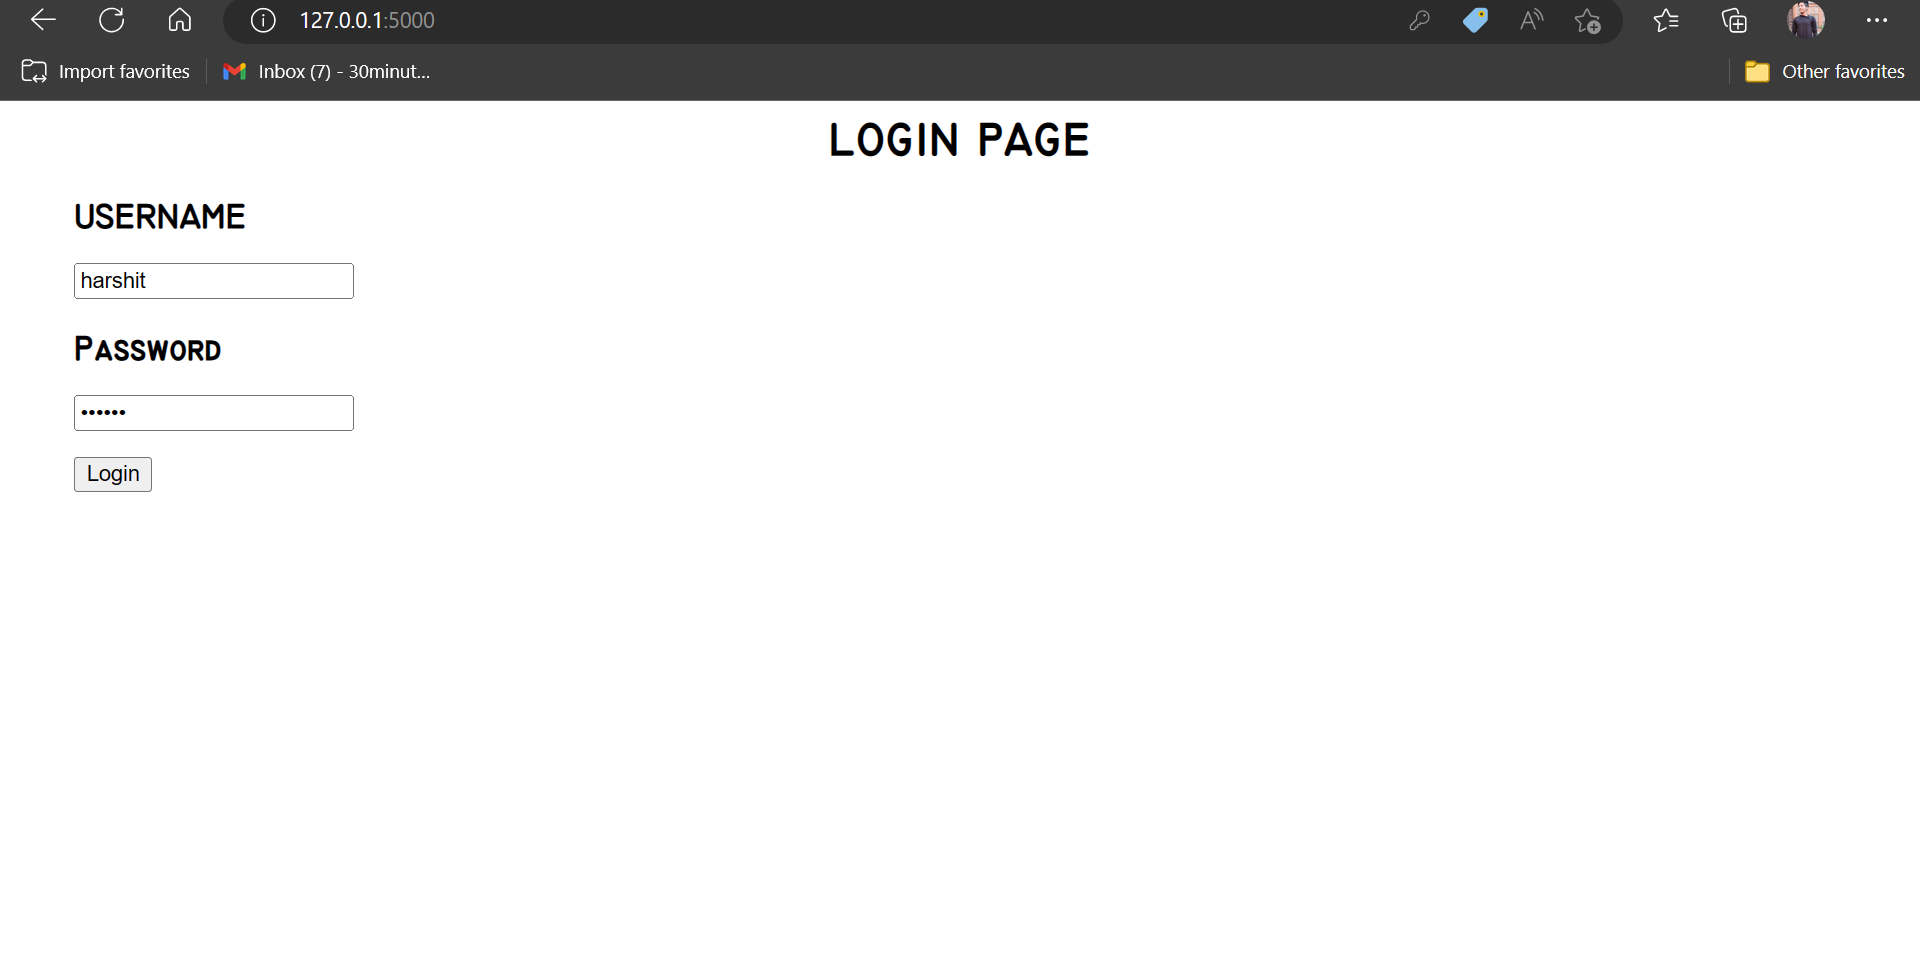

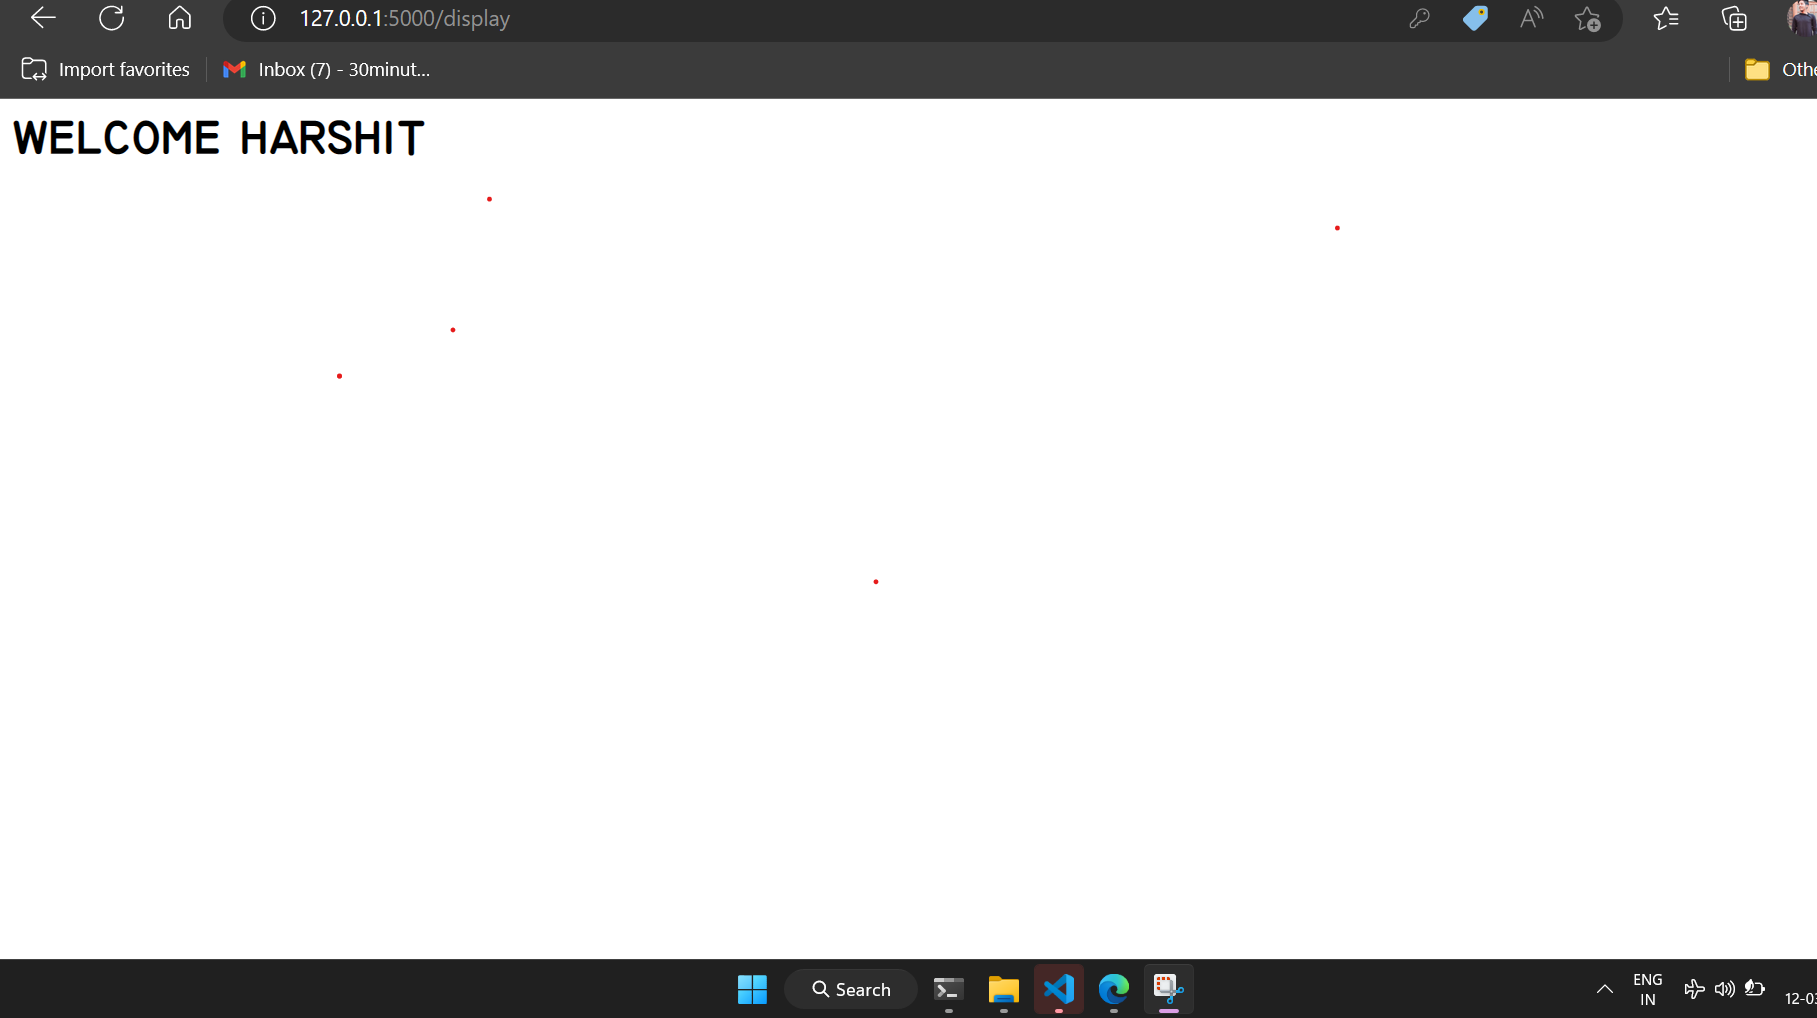

### Q3. Why is redirect() used in Flask?

    The redirect function is very useful in Flask because it allows you to tell your app which URL it should go to 
    when a certain action is performed by an end-user. Redirects are also useful for managing URLs in your
    application.

In [28]:
# Example
from flask import Flask,redirect,url_for

app=Flask(__name__)

@app.route("/home")
def home():
    return "<center><h1>HOME PAGE</h1><center>"

@app.route("/admin")
def admin():
    return "<center><h1>Admin Page</h1></center>"

@app.route("/student")
def student():
    return"<center><h1>Student Page</h1></center>"

@app.route("/home/<user>/")
def user(user):
    if user=="admin":
        return redirect(url_for('admin'))
    if user=="student":
        return redirect(url_for('student'))
    else:
        return "<center><h1>Invlaid Entry</h1><center>"

if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Mar/2023 12:14:15] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [12/Mar/2023 12:14:20] "GET /home HTTP/1.1" 200 -


### Q4. What are templates in Flask? Why is the render_template() function used?

**In Flask, templates are used to create dynamic HTML pages. Templates are essentially HTML files that include placeholders for dynamic content. When a user requests a page, Flask populates the placeholders with the appropriate content and sends the complete HTML page to the user's browser.**


**The render_template() function is used to render templates in Flask. This function takes the name of the template file (e.g., index.html) as an argument, and any additional data that needs to be passed to the template. It then returns the rendered HTML content as a string, which can be sent back to the user's browser as a response.**

In [35]:
# Example

from flask import Flask, render_template

app=Flask(__name__)

@app.route("/")
def home():
    data={
        'name':"Harshit",
        'title':"Home Page"
    }
    return render_template("home.html",data=data)

if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Mar/2023 12:30:36] "GET / HTTP/1.1" 200 -


### Screenshot of the output-

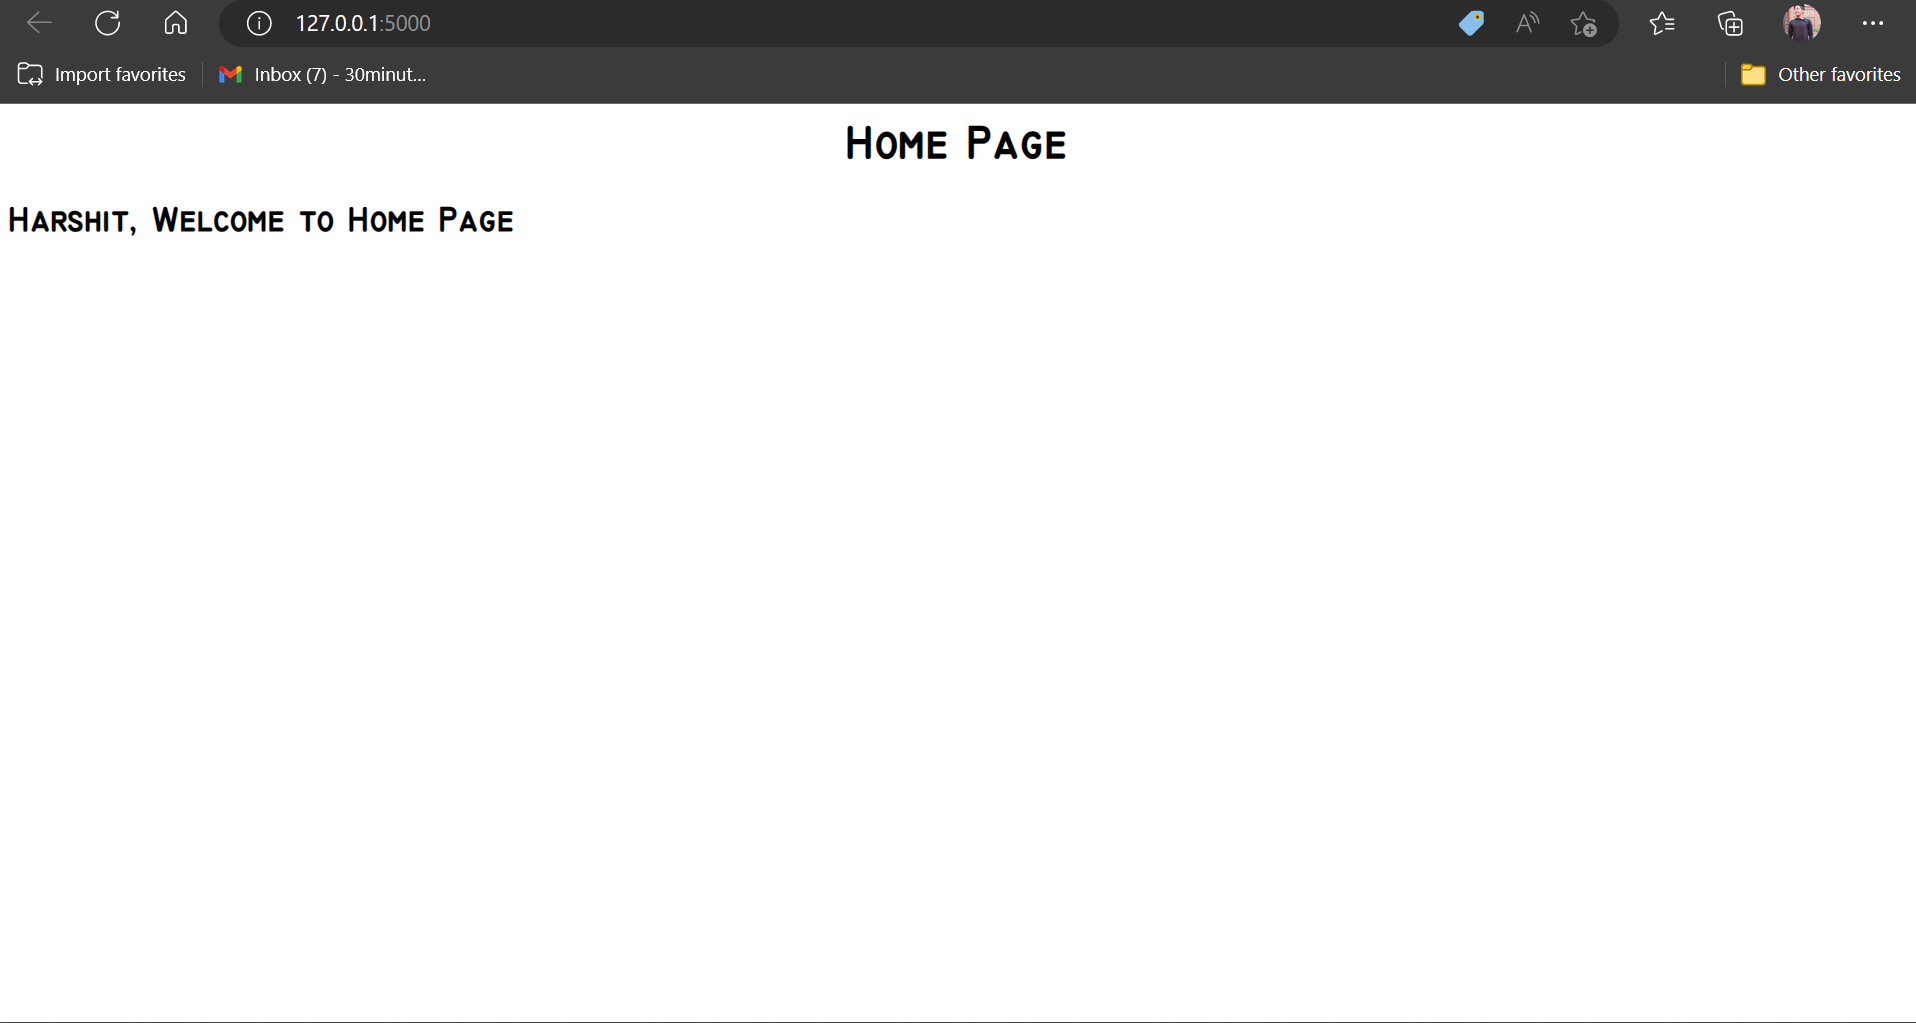

### Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

In [72]:
from flask import Flask, render_template,request, redirect,url_for, jsonify


app=Flask(__name__)

 
def bmi_msg(bmi):
    if bmi<15:
        return "Very severely underweight"
    elif bmi>=15 and bmi<16:
        return "Deverely underweight"
    elif bmi>=16 and bmi<18.5:
        return "Underweight"
    elif bmi>=18.5 and bmi<25:
        return "Normal (healthy weight)"
    elif bmi>=25 and bmi<30:
        return "Overweight"
    elif bmi>=30 and bmi<35:
        return "Moderately obese"
    elif bmi>=35 and bmi<40:
        return "Severely obese"
    else:
        return "Very severely obese"
    

@app.route("/bmi", methods=['GET','POST'])
def bmi():
    if request.method=="POST":
        weight =int(request.form['weight'])
        height =int(request.form['height'])
        Bmi=round((weight)/(2*(height/100)),2)
        msg=bmi_msg(Bmi)
        data={
              "bmi":Bmi,
              "height":height,
              "weight":weight,
              "msg":msg
             }
        return render_template('index.html', data=data)

    else:
        return render_template("index.html")
    

@app.route('/api',methods=['POST'])
def api():
    if request.method=="POST":
        weight =int(request.json['weight'])
        height =int(request.json['height'])
        
        Bmi=round((weight)/(2*(height/100)),2)
        msg=bmi_msg(Bmi)
        data={"bmi":Bmi,
              "msg":msg}
        
        string1=f"BMI : {data['bmi']}"
        string2=f"BMI Category : {data['msg']}"
        return jsonify(string1,string2)
    
    
if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Mar/2023 16:01:18] "POST /bmi HTTP/1.1" 200 -


#### Screenshot of Output-

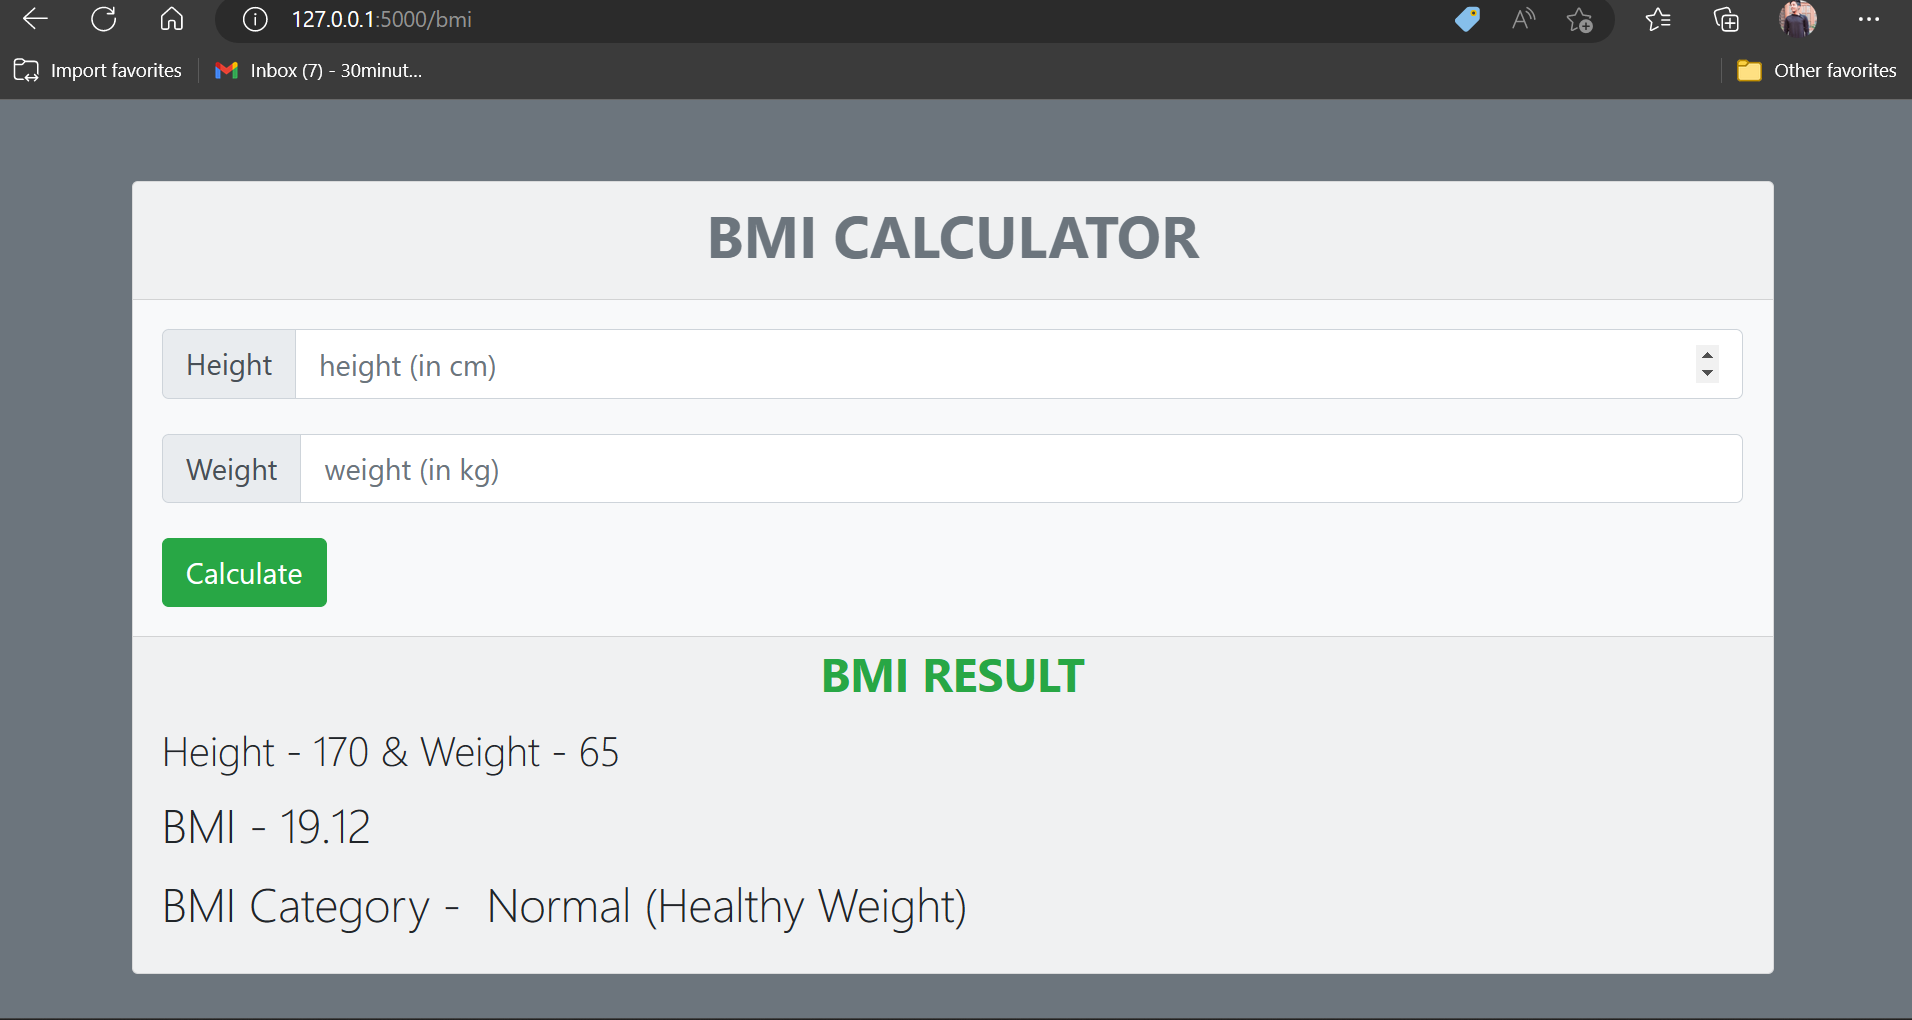

#### Screenshot of API testing on Postman-

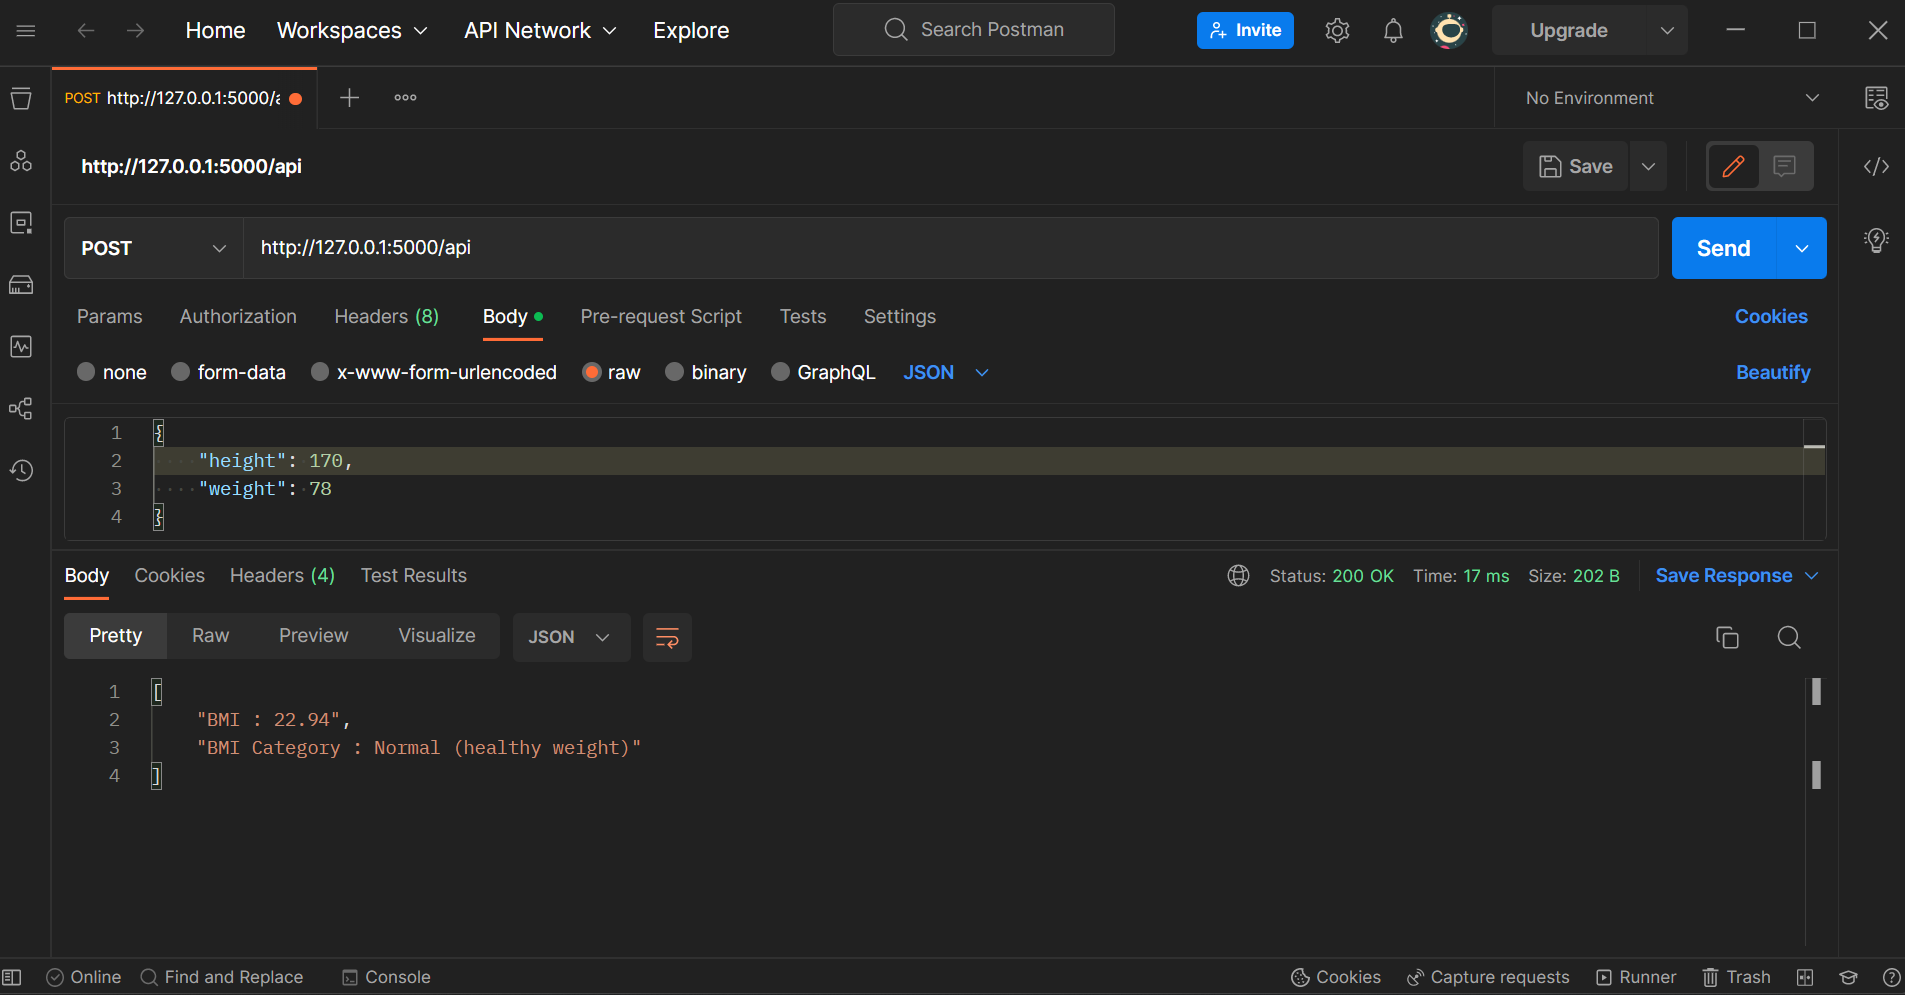